# Deep Learning Course 
### assignment 3: Computer Vision

1. MNIST classiffication
    1. Fully connected network

(60000, 784) (60000,)
(10000, 28, 28, 1) (60000,)


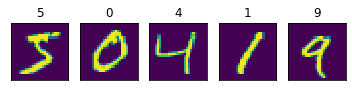

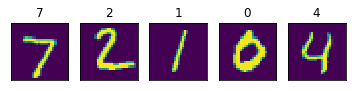

In [22]:
#imports
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Reshape, Flatten
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import optimizers

#load data
(x_train_2d, y_train), (x_test_2d, y_test) = mnist.load_data()
x_train = x_train_2d.reshape(-1,784)/255.0
x_test = x_test_2d.reshape(-1,784)/255.0

x_train_2d = x_train_2d.reshape(x_train_2d.shape+(1,))/255.0
x_test_2d = x_test_2d.reshape(x_test_2d.shape+(1,))/255.0

#visualize some
def seeDataMNIST(x,y,n=5):
    plt.figure()
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        ax.imshow(x[i,:].reshape(28,28))
        ax.set_title(y[i])
        ax.set_xticks([])
        ax.set_yticks([])
        
def plot_history(history):
    # Visualize loss history
    epoch_count = [i+1 for i in range(len(history['loss']))]
    plt.plot(epoch_count, history['loss'], 'r--')
    if 'val_loss' in history:
        plt.plot(epoch_count, history['val_loss'], 'b-')
        plt.legend(['Training Loss', 'Validation Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
        
print(x_train.shape, y_train.shape)
print(x_test_2d.shape, y_train.shape)
seeDataMNIST(x_train, y_train)
seeDataMNIST(x_test, y_test)

In [ ]:
np.unique(x_train[143,:])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 5s 94us/step - loss: 0.7002 - acc: 0.8128 - val_loss: 0.3350 - val_acc: 0.9052
Epoch 2/30
48000/48000 [==============================] - 4s 75us/step - loss: 0.3166 - acc: 0.9104 - val_loss: 0.2702 - val_acc: 0.9228
Epoch 3/30
48000/48000 [==============================] - 4s 83us/step - loss: 0.2620 - acc: 0.9253 - val_loss: 0.2303 - val_acc: 0.9341
Epoch 4/30
48000/48000 [==============================] - 4s 78us/step - loss: 0.2269 - acc: 0.9354 - val_loss: 0.2072 - val_acc: 0.9448
Epoch 5/30
48000/48000 [==============================] - 4s 78us/step - loss: 0.2000 - acc: 0.9430 - val_loss: 0.1918 - val_acc: 0.9466
Epoch 6/30
48000/48000 [==============================] - 4s 84us/step - loss: 0.1787 - acc: 0.9488 - val_loss: 0.1704 - val_acc: 0.9539
Epoch 7/30
48000/48000 [==============================] - 4s 90us/step - loss: 0.1611 - acc: 0.9539 - val_loss: 0.1592 - val_acc

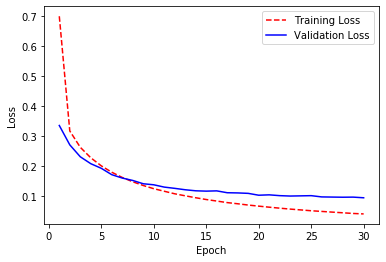

In [82]:
#densely connected network
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

#train it
epoh=30
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=epoh, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

plot_history(hist.history)

In [78]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_139 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_140 (Activation)  (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


##### Compare performance with your previous results;  do youobserve similar accuracy?  how many times faster/slower was your own implementation? 

Accuracy achieved is similar to the one I was able to achieve with my code, but it is acquired more easily, with much less code and quite a few times faster convergence. 




    1.2. Convolutional network

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 14s 282us/step - loss: 0.8738 - acc: 0.7376 - val_loss: 0.3241 - val_acc: 0.9028
Epoch 2/30
48000/48000 [==============================] - 12s 248us/step - loss: 0.2807 - acc: 0.9156 - val_loss: 0.2253 - val_acc: 0.9335
Epoch 3/30
48000/48000 [==============================] - 12s 249us/step - loss: 0.1992 - acc: 0.9397 - val_loss: 0.1665 - val_acc: 0.9504
Epoch 4/30
48000/48000 [==============================] - 12s 255us/step - loss: 0.1535 - acc: 0.9538 - val_loss: 0.1394 - val_acc: 0.9590
Epoch 5/30
48000/48000 [==============================] - 12s 255us/step - loss: 0.1256 - acc: 0.9628 - val_loss: 0.1102 - val_acc: 0.9681
Epoch 6/30
48000/48000 [==============================] - 12s 258us/step - loss: 0.1071 - acc: 0.9679 - val_loss: 0.1015 - val_acc: 0.9706
Epoch 7/30
48000/48000 [==============================] - 12s 256us/step - loss: 0.0936 - acc: 0.9713 - val_loss: 0.

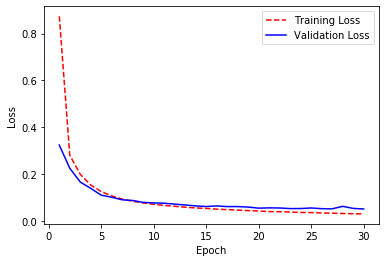

In [81]:
conv_model = Sequential()
conv_model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(16, (3,3), padding='same'))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(32, (3,3), padding='same'))
conv_model.add(Activation('relu'))
conv_model.add(Flatten())
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

#train it
epoh=30
minibatch = 64

#change lr, minibatch size, num epochs. for good convergence. get to 98+
sgd = optimizers.SGD(lr=0.01)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

conv_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = conv_model.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)

test_loss, test_acc = conv_model.evaluate(x_test_2d, y_test)

print('Test accuracy:', test_acc)

plot_history(hist.history)

In [62]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
activation_111 (Activation)  (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
activation_112 (Activation)  (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 7, 7, 32)          4640      
__________

##### How many learnable weights does this network contain?  Compare with how many weights youhad in the previous exercise.

After some tries I chose minibatch size 64, learning rate of 0.01 and after 30 epochs, this gave an accuracy of 0.9885 on the test set. 
The number of trainable weights now was only 21,578 while before it was much higher, at 203,530.


        1.3. Exchange ReLU and MaxPooling

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 13s 266us/step - loss: 0.9318 - acc: 0.7474 - val_loss: 0.2794 - val_acc: 0.9193
Epoch 2/30
48000/48000 [==============================] - 13s 265us/step - loss: 0.2528 - acc: 0.9242 - val_loss: 0.1862 - val_acc: 0.9452
Epoch 3/30
48000/48000 [==============================] - 15s 309us/step - loss: 0.1751 - acc: 0.9471 - val_loss: 0.1422 - val_acc: 0.9571
Epoch 4/30
48000/48000 [==============================] - 13s 266us/step - loss: 0.1346 - acc: 0.9591 - val_loss: 0.1254 - val_acc: 0.9623
Epoch 5/30
48000/48000 [==============================] - 13s 265us/step - loss: 0.1135 - acc: 0.9657 - val_loss: 0.1044 - val_acc: 0.9677
Epoch 6/30
48000/48000 [==============================] - 13s 272us/step - loss: 0.0990 - acc: 0.9699 - val_loss: 0.0993 - val_acc: 0.9698
Epoch 7/30
48000/48000 [==============================] - 13s 264us/step - loss: 0.0897 - acc: 0.9725 - val_loss: 0.

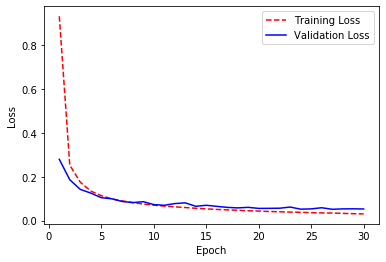

In [83]:
aktivacija = 'relu' #'tanh'
conv_model2 = Sequential()
conv_model2.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1)))
conv_model2.add(MaxPooling2D(pool_size=(2, 2)))
conv_model2.add(Activation(aktivacija))
conv_model2.add(Conv2D(16, (3,3), padding='same'))
conv_model2.add(MaxPooling2D(pool_size=(2, 2)))
conv_model2.add(Activation(aktivacija))
conv_model2.add(Conv2D(32, (3,3), padding='same'))
conv_model2.add(Activation(aktivacija))
conv_model2.add(Flatten())
conv_model2.add(Dense(10))
conv_model2.add(Activation('softmax'))

conv_model2.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = conv_model2.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)

test_loss, test_acc = conv_model2.evaluate(x_test_2d, y_test)

print('Test accuracy:', test_acc)

plot_history(hist.history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 14s 295us/step - loss: 0.9800 - acc: 0.7565 - val_loss: 0.3837 - val_acc: 0.8924
Epoch 2/30
48000/48000 [==============================] - 13s 276us/step - loss: 0.3550 - acc: 0.8977 - val_loss: 0.2891 - val_acc: 0.9183
Epoch 3/30
48000/48000 [==============================] - 14s 284us/step - loss: 0.2853 - acc: 0.9168 - val_loss: 0.2454 - val_acc: 0.9283
Epoch 4/30
48000/48000 [==============================] - 14s 296us/step - loss: 0.2442 - acc: 0.9282 - val_loss: 0.2134 - val_acc: 0.9392
Epoch 5/30
48000/48000 [==============================] - 14s 298us/step - loss: 0.2138 - acc: 0.9366 - val_loss: 0.1895 - val_acc: 0.9452
Epoch 6/30
48000/48000 [==============================] - 13s 276us/step - loss: 0.1900 - acc: 0.9445 - val_loss: 0.1712 - val_acc: 0.9510
Epoch 7/30
48000/48000 [==============================] - 13s 279us/step - loss: 0.1705 - acc: 0.9498 - val_loss: 0.

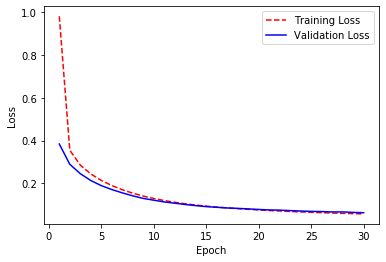

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 13s 279us/step - loss: 0.9372 - acc: 0.7540 - val_loss: 0.3925 - val_acc: 0.8900
Epoch 2/30
48000/48000 [==============================] - 13s 262us/step - loss: 0.3642 - acc: 0.8944 - val_loss: 0.2912 - val_acc: 0.9190
Epoch 3/30
48000/48000 [==============================] - 12s 255us/step - loss: 0.2877 - acc: 0.9154 - val_loss: 0.2414 - val_acc: 0.9323
Epoch 4/30
48000/48000 [==============================] - 12s 259us/step - loss: 0.2425 - acc: 0.9286 - val_loss: 0.2093 - val_acc: 0.9392
Epoch 5/30
48000/48000 [==============================] - 12s 259us/step - loss: 0.2097 - acc: 0.9382 - val_loss: 0.1823 - val_acc: 0.9469
Epoch 6/30
48000/48000 [==============================] - 12s 257us/step - loss: 0.1843 - acc: 0.9454 - val_loss: 0.1622 - val_acc: 0.9529
Epoch 7/30
48000/48000 [==============================] - 13s 268us/step - loss: 0.1640 - acc: 0.9521 - val_loss: 0.

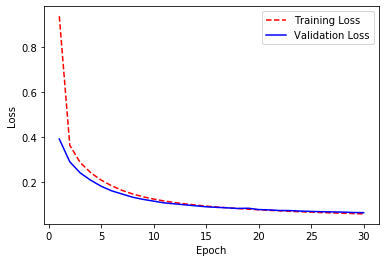

In [86]:
#do the same, but with tanh:
from timeit import default_timer as timer

conv_model = Sequential()
conv_model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1)))
conv_model.add(Activation('tanh'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(16, (3,3), padding='same'))
conv_model.add(Activation('tanh'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(32, (3,3), padding='same'))
conv_model.add(Activation('tanh'))
conv_model.add(Flatten())
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

#train it
epoh=30
minibatch = 64

#change lr, minibatch size, num epochs. for good convergence. get to 98+
sgd = optimizers.SGD(lr=0.01)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

conv_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = timer()
hist1 = conv_model.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
end = timer()

test_loss, test_acc = conv_model.evaluate(x_test_2d, y_test)


print('Test accuracy:', test_acc)
print('Time elapsed:', end-start)
plot_history(hist1.history)

#------------------

conv_model = Sequential()
conv_model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Activation('tanh'))
conv_model.add(Conv2D(16, (3,3), padding='same'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Activation('tanh'))
conv_model.add(Conv2D(32, (3,3), padding='same'))
conv_model.add(Activation('tanh'))
conv_model.add(Flatten())
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

#train it
conv_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = timer()
hist2 = conv_model.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
end = timer()

test_loss, test_acc = conv_model.evaluate(x_test_2d, y_test)

print('Test accuracy:', test_acc)
print('Time elapsed:', end-start)
plot_history(hist2.history)

##### What  would  change  (accuracy,  speed)  if  you  swap  the  order  of  these  twooperations?  Test  your  hypothesis  empirically  by  exchanging  layers  2  and  3,  resp.  layers  5  and  6,  suchthat the pooling operation is performed before the ReLU. The difference is probably more distinct for thehyperbolic tangent activation function, why?

With relu, not much difference is seen in speed and accuracy. (also in theory, there should be no difference - relu leaves everything except negative values as they are, and max pool will always give positive values unless the pooling area only contains negative values. But in that case, the relu before or after will make the final result 0. 
And for tanh: also not much difference experimentally, slightly slower otherwise perhaps. (What would theory say? Should there be difference in results?? <- probably not. I think there should never be a difference, as long as the activ.functions are monotonous, increasing.)

Either way, considerng just the number of times a nonlinearity need to be applied, it is more efficient to apply it after pooling, as then you need to apply it to less data.

        1.4. Exchanging SGD with Adam

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 14s 297us/step - loss: 0.2678 - acc: 0.9195 - val_loss: 0.0945 - val_acc: 0.9711
Epoch 2/30
48000/48000 [==============================] - 14s 282us/step - loss: 0.0745 - acc: 0.9775 - val_loss: 0.0578 - val_acc: 0.9828
Epoch 3/30
48000/48000 [==============================] - 14s 282us/step - loss: 0.0515 - acc: 0.9837 - val_loss: 0.0565 - val_acc: 0.9828
Epoch 4/30
48000/48000 [==============================] - 13s 275us/step - loss: 0.0412 - acc: 0.9868 - val_loss: 0.0512 - val_acc: 0.9843
Epoch 5/30
48000/48000 [==============================] - 13s 275us/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0417 - val_acc: 0.9868
Epoch 6/30
48000/48000 [==============================] - 13s 278us/step - loss: 0.0289 - acc: 0.9909 - val_loss: 0.0473 - val_acc: 0.9858
Epoch 7/30
48000/48000 [==============================] - 14s 289us/step - loss: 0.0258 - acc: 0.9915 - val_loss: 0.

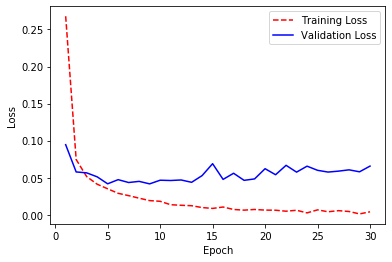

In [93]:
conv_model = Sequential()
conv_model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(16, (3,3), padding='same'))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(32, (3,3), padding='same'))
conv_model.add(Activation('relu'))
conv_model.add(Flatten())
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

#train it
epoh=30
minibatch = 64

#change lr, minibatch size, num epochs. for good convergence. get to 98+
sgd = optimizers.SGD(lr=0.01)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

conv_model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = conv_model.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)

test_loss, test_acc = conv_model.evaluate(x_test_2d, y_test)

print('Test accuracy:', test_acc)

plot_history(hist.history)

##### Do you manageto get better results faster than the plain SGD optimization?
YES!


        1.5. Variations of the network (regularization, lr decay, architecture...)

In [9]:
#use: adam, 50+epochs, regularization via early stopping. Try out: adaptive lr decay, dropout, batch norm, 
#additional layer?...
from keras.layers import BatchNormalization

def networkStructure(activations='relu', layerList=[8, 16, 32], padding='same', denseLayers=[]):
    """Making the network skeleton. Same activations and padding used in all layers.
       layerList includes numbers of feature maps in each layer respectively. If 0, do 
       batchnorm, and if bigger than 0 but <1, do dropout with that percentage. 
       Dropout cannot be the first layer (and neither does batchnorm, because we dont 
       have multiple channels?). Each convolutional layer is always followed by maxpooling
       and then activation layers. 
       denseLayers is a list of subsequent dense layers. Only permits integers<1 for dense 
       layer size, or 0<x<1 for dropout."""
    
    model = Sequential()
    for s in layerList:
        if s<0: #do convolution, but without pooling!
            model.add(Conv2D(-s, (3,3), padding=padding))
            model.add(Activation(activations))
        elif s==0:
            model.add(BatchNormalization())
        elif s<1:
            model.add(Dropout(rate=s))
        else:
            model.add(Conv2D(s, (3,3), padding=padding))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Activation(activations))
    model.add(Flatten())
    for l in denseLayers:
        if l<1:
            model.add(Dropout(rate=l))
        else:
            model.add(Dense(l))
            model.add(Activation(activations))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model


In [106]:
net = networkStructure('relu', [8, 16, 0.2, -32, 0.2, -64, 0.2], 'valid')

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 12s 240us/step - loss: 0.3301 - acc: 0.8961 - val_loss: 0.0744 - val_acc: 0.9770
Epoch 2/30
48000/48000 [==============================] - 11s 226us/step - loss: 0.1771 - acc: 0.9505 - val_loss: 0.0752 - val_acc: 0.9788
Epoch 3/30
48000/48000 [==============================] - 10s 205us/step - loss: 0.1608 - acc: 0.9557 - val_loss: 0.0769 - val_acc: 0.9786
Epoch 4/30
48000/48000 [==============================] - 10s 203us/step - loss: 0.1567 - acc: 0.9571 - val_loss: 0.0699 - val_acc: 0.9811
Epoch 5/30
48000/48000 [==============================] - 10s 208us/step - loss: 0.1603 - acc: 0.9567 - val_loss: 0.0640 - val_acc: 0.9806
Epoch 6/30
48000/48000 [==============================] - 10s 210us/step - loss: 0.1559 - acc: 0.9577 - val_loss: 0.0675 - val_acc: 0.9809
Epoch 7/30
48000/48000 [==============================] - 10s 210us/step - loss: 0.1458 - acc: 0.9614 - val_loss: 0.

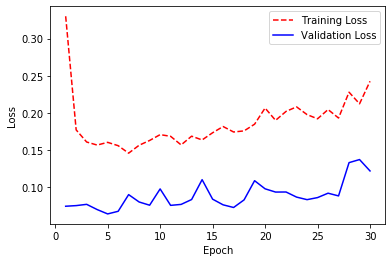

In [107]:
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 12s 242us/step - loss: 0.1697 - acc: 0.9646 - val_loss: 0.0907 - val_acc: 0.9842
Epoch 2/30
48000/48000 [==============================] - 10s 211us/step - loss: 0.1422 - acc: 0.9686 - val_loss: 0.0812 - val_acc: 0.9829
Epoch 3/30
48000/48000 [==============================] - 10s 209us/step - loss: 0.1339 - acc: 0.9696 - val_loss: 0.0703 - val_acc: 0.9837
Epoch 4/30
48000/48000 [==============================] - 10s 207us/step - loss: 0.1139 - acc: 0.9725 - val_loss: 0.0729 - val_acc: 0.9837
Epoch 5/30
48000/48000 [==============================] - 10s 210us/step - loss: 0.1123 - acc: 0.9733 - val_loss: 0.0658 - val_acc: 0.9858
Epoch 6/30
48000/48000 [==============================] - 10s 211us/step - loss: 0.1025 - acc: 0.9751 - val_loss: 0.0639 - val_acc: 0.9854
Epoch 7/30
48000/48000 [==============================] - 10s 207us/step - loss: 0.1041 - acc: 0.9743 - val_loss: 0.

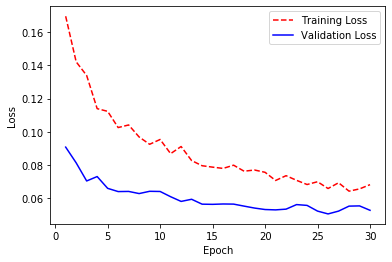

In [108]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

In [109]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
activation_202 (Activation)  (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
activation_203 (Activation)  (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 16)          0         
__________

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 20s 406us/step - loss: 0.2526 - acc: 0.9215 - val_loss: 0.0709 - val_acc: 0.9800
Epoch 2/30
48000/48000 [==============================] - 18s 373us/step - loss: 0.0808 - acc: 0.9755 - val_loss: 0.0551 - val_acc: 0.9840
Epoch 3/30
48000/48000 [==============================] - 19s 393us/step - loss: 0.0595 - acc: 0.9809 - val_loss: 0.0461 - val_acc: 0.9867
Epoch 4/30
48000/48000 [==============================] - 18s 385us/step - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0431 - val_acc: 0.9865
Epoch 5/30
48000/48000 [==============================] - 19s 394us/step - loss: 0.0395 - acc: 0.9877 - val_loss: 0.0373 - val_acc: 0.9893
Epoch 6/30
48000/48000 [==============================] - 19s 387us/step - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0389 - val_acc: 0.9882
Epoch 7/30
48000/48000 [==============================] - 19s 404us/step - loss: 0.0320 - acc: 0.9897 - val_loss: 0.

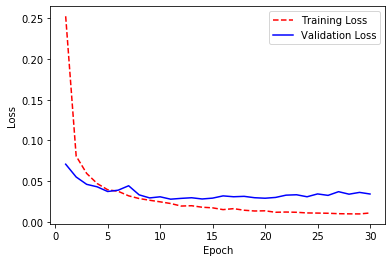

In [110]:
net = networkStructure('relu', [8, -16, 0.2, -32, 0.2, -64, 0.2], 'valid')

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

In [111]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 13, 13, 8)         0         
_________________________________________________________________
activation_207 (Activation)  (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 11, 11, 16)        1168      
_________________________________________________________________
activation_208 (Activation)  (None, 11, 11, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 9, 9, 32)          4640      
__________

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 19s 389us/step - loss: 0.2576 - acc: 0.9185 - val_loss: 0.0836 - val_acc: 0.9762
Epoch 2/30
48000/48000 [==============================] - 18s 368us/step - loss: 0.0792 - acc: 0.9756 - val_loss: 0.0639 - val_acc: 0.9802
Epoch 3/30
48000/48000 [==============================] - 18s 369us/step - loss: 0.0554 - acc: 0.9828 - val_loss: 0.0523 - val_acc: 0.9850
Epoch 4/30
48000/48000 [==============================] - 20s 420us/step - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0475 - val_acc: 0.9864
Epoch 5/30
48000/48000 [==============================] - 17s 352us/step - loss: 0.0392 - acc: 0.9870 - val_loss: 0.0379 - val_acc: 0.9878
Epoch 6/30
48000/48000 [==============================] - 16s 344us/step - loss: 0.0323 - acc: 0.9899 - val_loss: 0.0373 - val_acc: 0.9892
Epoch 7/30
48000/48000 [==============================] - 17s 354us/step - loss: 0.0272 - acc: 0.9909 - val_loss: 0.

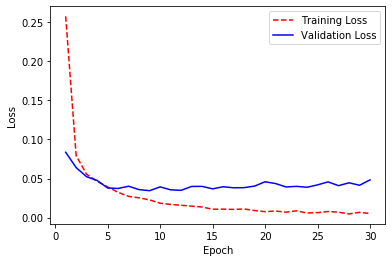

In [112]:
net = networkStructure('relu', [8, -16, 0.2, -32, 0.2, -64], 'valid')

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 74s 2ms/step - loss: 0.1703 - acc: 0.9484 - val_loss: 0.0780 - val_acc: 0.9762
Epoch 2/30
48000/48000 [==============================] - 75s 2ms/step - loss: 0.0575 - acc: 0.9825 - val_loss: 0.0454 - val_acc: 0.9866
Epoch 3/30
48000/48000 [==============================] - 73s 2ms/step - loss: 0.0420 - acc: 0.9871 - val_loss: 0.0500 - val_acc: 0.9851
Epoch 4/30
48000/48000 [==============================] - 74s 2ms/step - loss: 0.0312 - acc: 0.9902 - val_loss: 0.0411 - val_acc: 0.9886
Epoch 5/30
48000/48000 [==============================] - 72s 2ms/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0420 - val_acc: 0.9887
Epoch 6/30
48000/48000 [==============================] - 76s 2ms/step - loss: 0.0195 - acc: 0.9936 - val_loss: 0.0386 - val_acc: 0.9882
Epoch 7/30
48000/48000 [==============================] - 72s 2ms/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0419 - val_acc

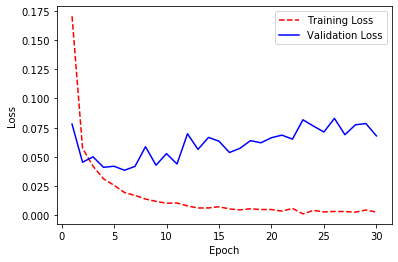

In [113]:
net = networkStructure('relu', [-8, -16, 0.2, -32, 0.2, -64], 'valid', [])

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 16s 342us/step - loss: 0.2118 - acc: 0.9352 - val_loss: 0.0831 - val_acc: 0.9744
Epoch 2/30
48000/48000 [==============================] - 15s 306us/step - loss: 0.0634 - acc: 0.9806 - val_loss: 0.0593 - val_acc: 0.9813
Epoch 3/30
48000/48000 [==============================] - 15s 307us/step - loss: 0.0446 - acc: 0.9862 - val_loss: 0.0575 - val_acc: 0.9815
Epoch 4/30
48000/48000 [==============================] - 16s 342us/step - loss: 0.0332 - acc: 0.9892 - val_loss: 0.0545 - val_acc: 0.9858
Epoch 5/30
48000/48000 [==============================] - 16s 340us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0420 - val_acc: 0.9878
Epoch 6/30
48000/48000 [==============================] - 16s 340us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0428 - val_acc: 0.9873
Epoch 7/30
48000/48000 [==============================] - 16s 336us/step - loss: 0.0179 - acc: 0.9942 - val_loss: 0.

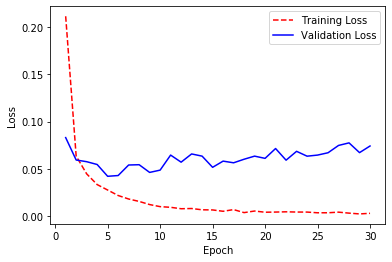

In [114]:
net = networkStructure('relu', [8, -16, -32, -64], 'valid')

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 80s 2ms/step - loss: 0.1704 - acc: 0.9495 - val_loss: 0.0637 - val_acc: 0.9834
Epoch 2/30
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0677 - acc: 0.9802 - val_loss: 0.0469 - val_acc: 0.9862
Epoch 3/30
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0519 - acc: 0.9855 - val_loss: 0.0642 - val_acc: 0.9830
Epoch 4/30
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0415 - acc: 0.9873 - val_loss: 0.0367 - val_acc: 0.9898
Epoch 5/30
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0386 - acc: 0.9891 - val_loss: 0.0322 - val_acc: 0.9907
Epoch 6/30
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0354 - acc: 0.9895 - val_loss: 0.0420 - val_acc: 0.9899
Epoch 7/30
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0343 - acc: 0.9901 - val_loss: 0.0329 - val_acc

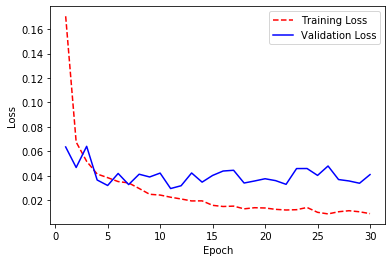

In [116]:
net = networkStructure('relu', [-16, -16, 0, -32, 32, 0, -64, -64, 0], 'valid', [0.3, 120, 0.3])

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch, validation_split=0.2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

Epoch 1/30
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1876 - acc: 0.9454
Epoch 2/30
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0743 - acc: 0.9780
Epoch 3/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0600 - acc: 0.9829
Epoch 4/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0515 - acc: 0.9856
Epoch 5/30
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0456 - acc: 0.9875
Epoch 6/30
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0414 - acc: 0.9883
Epoch 7/30
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0363 - acc: 0.9894
Epoch 8/30
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0360 - acc: 0.9898
Epoch 9/30
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0318 - acc: 0.9907
Epoch 10/30
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0288 - acc: 0.9918

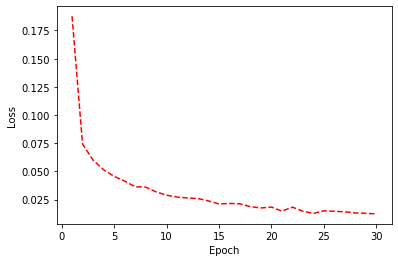

In [124]:
#best performing model seems to be this last one. Spo let's train it on the whole dataset now, and then evaluate
net = networkStructure('relu', [-16, -16, 0, -32, 32, 0, -64, -64, 0], 'valid', [0.4, 120, 0.4])

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

Epoch 1/30
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1328 - acc: 0.9602
Epoch 2/30
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0590 - acc: 0.9829
Epoch 3/30
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0401 - acc: 0.9880
Epoch 4/30
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0353 - acc: 0.9894
Epoch 5/30
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0307 - acc: 0.9906
Epoch 6/30
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0286 - acc: 0.9918
Epoch 7/30
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0236 - acc: 0.9930
Epoch 8/30
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0218 - acc: 0.9932
Epoch 9/30
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0216 - acc: 0.9940
Epoch 10/30
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0193 - a

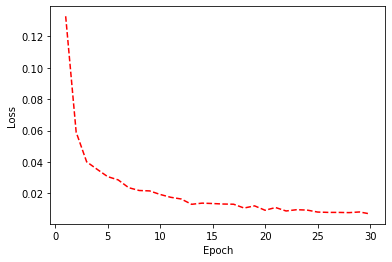

In [126]:
#best performing model seems to be this last one. Spo let's train it on the whole dataset now, and then evaluate
net = networkStructure('relu', [-16, -16, 0, 32, 32, 0, -64, -64, 0], 'same', [0.3, 120, 0.2])

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

W0809 16:28:51.847625 140643708168000 deprecation_wrapper.py:119] From /home/eva/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0809 16:28:51.916833 140643708168000 deprecation_wrapper.py:119] From /home/eva/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0809 16:28:52.081482 140643708168000 deprecation.py:506] From /home/eva/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch 1/30
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1508 - acc: 0.9546
Epoch 2/30
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0550 - acc: 0.9836
Epoch 3/30
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0394 - acc: 0.9883
Epoch 4/30
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0333 - acc: 0.9897
Epoch 5/30
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0276 - acc: 0.9910
Epoch 6/30
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0227 - acc: 0.9928
Epoch 7/30
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0213 - acc: 0.9930
Epoch 8/30
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0205 - acc: 0.9934
Epoch 9/30
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0175 - acc: 0.9944
Epoch 10/30
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0173 - acc: 0.9946

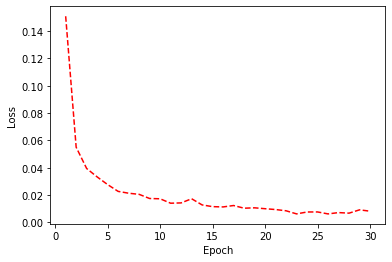

In [12]:
#best performing model seems to be this last one. Spo let's train it on the whole dataset now, and then evaluate
net = networkStructure('relu', [-16, -16, 0, 32, 32, 0, -64, -64, 0], 'same', [0.3, 120, 0.2])

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
net.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = net.fit(x_train_2d, y_train, epochs=epoh, batch_size=minibatch*2)
test_loss, test_acc = net.evaluate(x_test_2d, y_test)
print('Test accuracy:', test_acc)
plot_history(hist.history)

In [3]:
from keras.models import load_model

#net.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del net  # deletes the existing model

# returns a compiled model, identical to the previous one
net = load_model('my_model.h5')

W0809 21:32:29.468210 140579216480064 deprecation_wrapper.py:119] From /home/eva/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 21:32:29.492930 140579216480064 deprecation_wrapper.py:119] From /home/eva/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 21:32:29.568662 140579216480064 deprecation_wrapper.py:119] From /home/eva/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 21:32:29.569538 140579216480064 deprecation_wrapper.py:119] From /home/eva/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0809 2

In [4]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [16]:
from keras.utils import plot_model
plot_model(net, to_file='/home/eva/Desktop/courses/current-courses/DeepLearningCourse/Assignment3/finalnet.png')

In [6]:
from sklearn.metrics import confusion_matrix
#plot the confusion matrix
y_predicted = net.predict_classes(x_test_2d)

In [1]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix' #, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


plot_confusion_matrix(y_test, y_predicted, [i+1 for i in range(10)])

NameError: name 'plt' is not defined

In [20]:
#plot examples of images that were wrongly classified
wrongs = y_test!=y_predicted
wrongSlike = x_test_2d[wrongs, :].squeeze()

In [21]:
wrongSlike.shape

(74, 28, 28)

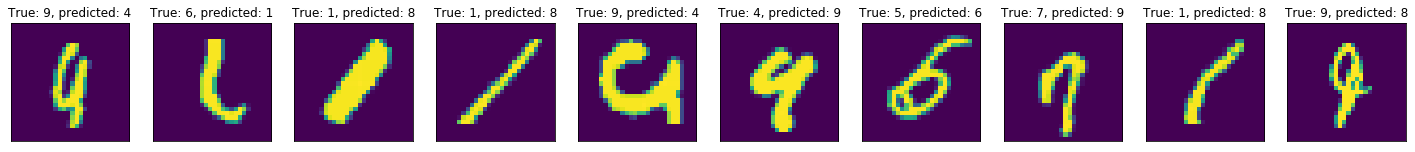

In [26]:
def seeWrongs(x,y,y_p,n=10):
    plt.figure(figsize = (n*2.5, 3))
    indexi = np.random.randint(low=0, high=x.shape[0]-1, size=n)
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        ax.imshow(x[indexi[i],:].reshape(28,28))
        ax.set_title('True: {0}, predicted: {1}'.format(y[indexi[i]], y_p[indexi[i]]))
        ax.set_xticks([])
        ax.set_yticks([])

seeWrongs(wrongSlike, y_test[wrongs], y_predicted[wrongs])

For the best performing model, also include aconfusion matrixof the classification results on the test datapartition.  Provide a few examples of misclassified images (image, including a note about the real class and predicted class).